In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import os
import CosmoBolognaLib as cbl

In [2]:
def plot_vsf(void_fn, ax=None, **kwargs):
    
    if ax is None: fig, ax = plt.subplots(1)
    r, vsf, err = np.load(void_fn)
    ax.errorbar(r, vsf, err, **kwargs)

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(axis='y')
    ax.grid(axis='x', which='both')
    ax.set_ylabel('$dn/dlnR$ ($h^{-1}Mpc)^{-3}$', fontsize=16)
    ax.set_xlabel('$R$ ($h^{-1}Mpc$)', fontsize=16)
    ax.set_xlim(r[-1]-1, r[vsf>0].max()+5)

    ax.xaxis.set_minor_formatter(ScalarFormatter())

Plot measured void size function for BigMD CMASS box.

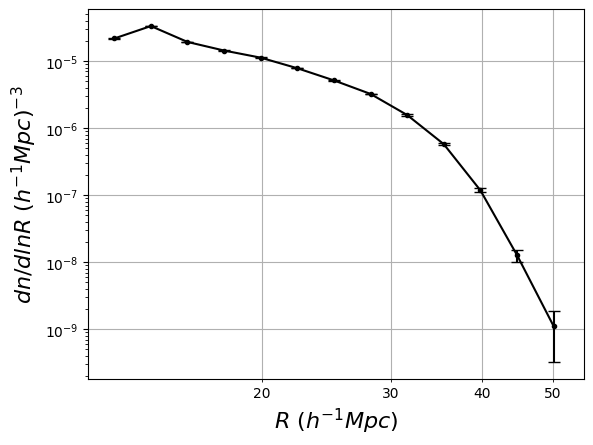

In [7]:
plot_vsf("output/void_vsf.npy", marker='o', color='k', markersize=3, capsize=4)

Plot theoretical void size function.

In [3]:
def plot_theory(cosm, zz, b_eff, R_min, R_max, n_val, ax=None, 
                model="Vdn", slope=0.854, offset=0.420, deltav_NL=-0.795, 
                del_c=1.69, method_Pk="EisensteinHu", **kwargs):
    
    if ax is None: fig, ax = plt.subplots(1)
        
    RR = np.logspace(np.log10(R_min), np.log10(R_max), n_val , endpoint=True)
    theory = np.zeros(n_val)
    for i in range(n_val):
        theory[i] = cosm.size_function(RR[i], zz, model, b_eff,
                                       slope, offset, deltav_NL, 
                                       del_c, method_Pk)

    ax.plot(RR, theory, **kwargs)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(axis='y')
    ax.grid(axis='x', which='both')
    ax.set_ylabel('$dn/dlnR$ ($h^{-1}Mpc)^{-3}$', fontsize=14)
    ax.set_xlabel('$R$ ($h^{-1}Mpc$)', fontsize=14)

In [4]:
# set cosmology
cosm = cbl.Cosmology(0.307, 0.0482, 0., 3.04, 0, 0.693, 0.678)
cosm.set_sigma8(0.8228)
plot_args = 12., 55., 50  # rmin, rmax, n

Explore free parameters.

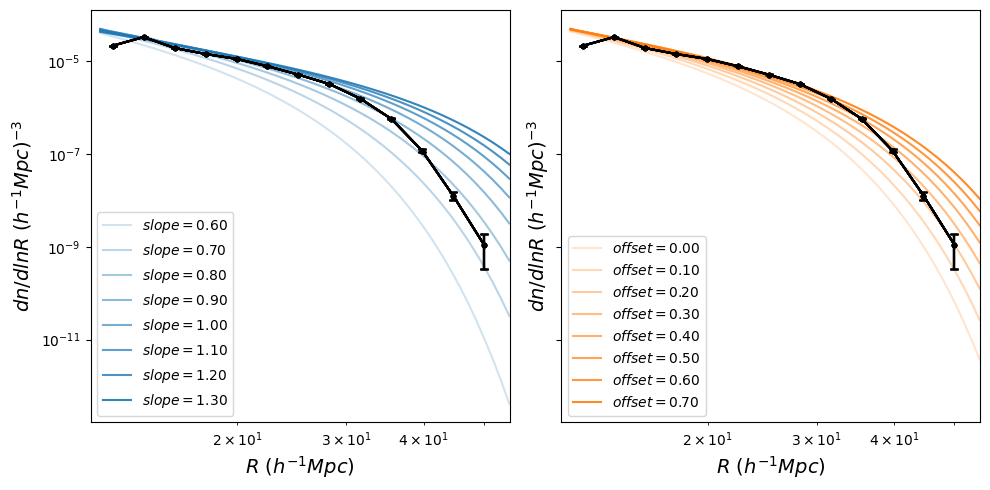

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5), sharey=True)
# fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(10,10), sharey=True, sharex=True)

# vary nuisance parameters
slope = np.arange(0.6,1.4,0.1)
b_eff = 2*slope#np.arange(1.6,2.4,0.1)
offset = np.arange(0.,0.8,0.1)  # >0
# deltav_NL = -np.arange(0.6,1,0.1)

for i in range(8):
    
#     # vary b_eff
#     plot_vsf("output/void_vsf.npy", marker='o', color='k', markersize=3, capsize=3, ax=ax2)
#     plot_theory(cosm, 0.52, b_eff[i], slope=1., *plot_args, ax=ax2, color='C0', alpha=0.1*i + 0.2,
#                 label=f'$b_\mathrm{{eff}}={b_eff[i]:.2f}$')
    
    # vary slope
    plot_vsf("output/void_vsf.npy", marker='o', color='k', markersize=3, capsize=3, ax=ax1)
    plot_theory(cosm, 0.52, 2, *plot_args, slope=slope[i], ax=ax1, color='C0', alpha=0.1*i + 0.2,
                label=f'$slope={slope[i]:.2f}$')
    
    # vary offset
    plot_vsf("output/void_vsf.npy", marker='o', color='k', markersize=3, capsize=3, ax=ax2)
    plot_theory(cosm, 0.52, 2, *plot_args, offset=offset[i], ax=ax2, color='C1', alpha=0.1*i + 0.2,
                label=f'$offset={offset[i]:.2f}$')
    
#     # vary deltav_NL
#     plot_vsf("output/void_vsf.npy", marker='o', color='k', markersize=3, capsize=3, ax=ax4)
#     plot_theory(cosm, 0.52, 2, *plot_args, deltav_NL=deltav_NL[i], ax=ax4, color=f'C{i}', 
#                 label=f'$\delta_\mathrm{{NL}}={deltav_NL[i]:.2f}$')
    
    
ax1.legend()
ax2.legend()
# ax3.legend()
# ax4.legend()
plt.tight_layout()

Explore cosmology

In [5]:
def plot_frac(RR, fid, err, cosm, zz, b_eff, frac_dev=True, ax=None, 
                model="Vdn", slope=0.854, offset=0.420, deltav_NL=-0.7, 
                del_c=1.69, method_Pk="EisensteinHu", **kwargs):
    
    if ax is None: fig, ax = plt.subplots(1)
        
#     RR = np.logspace(np.log10(R_min), np.log10(R_max), err.size, endpoint=True)
    theory = np.zeros(err.size)
    for i in range(err.size):
        theory[i] = cosm.size_function(RR[i], zz, model, b_eff,
                                       slope, offset, deltav_NL, 
                                       del_c, method_Pk)
    
    y = (theory-fid)
    label = '$(N_\mathrm{th} - N_\mathrm{fid})$'
    # fractional deviation
    if frac_dev: 
        y /= err
        label += '$/\sigma_\mathrm{Poisson}$'
    ax.plot(RR, y, **kwargs)
#     ax.set_xscale('log')
    ax.grid()
    ax.set_ylabel(label, fontsize=14)
    ax.set_xlabel('$R$ ($h^{-1}Mpc$)', fontsize=14)
    
def labelling(Oc, i, N, var):
    mid = N//2
    offset = abs(var * (N-1 - 2*i) / (N-1)) * 100
    if i<mid:
        label = f'-{offset:.0f}%'
    elif i>mid:
        label = f'+{offset:.0f}%'
    else:
        label = f'{Oc:.2f}'
    return label

In [6]:
# set cosmology
Om = 0.307
Ode = 0.693
h = 0.678
sigma8 = 0.8228

# set data parameters
z = 0.52
b_eff = 2.

fid_cosm = cbl.Cosmology(Om, 0.0482, 0., 3.04, 0, Ode, h)
fid_cosm.set_sigma8(sigma8)

r, vsf, err = np.load("output/rstep0.01_deltav0.7_void_vsf.npy")
r = r.astype(np.float64)
fid = cosm.size_function(r, z, "Vdn", b_eff, 0.854, 0.420, -0.7)
#                          slope, offset, deltav_NL, 
#                          del_c, method_Pk)

/home/ntbfin/anaconda3/envs/void-gal/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/ntbfin/anaconda3/envs/void-gal/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


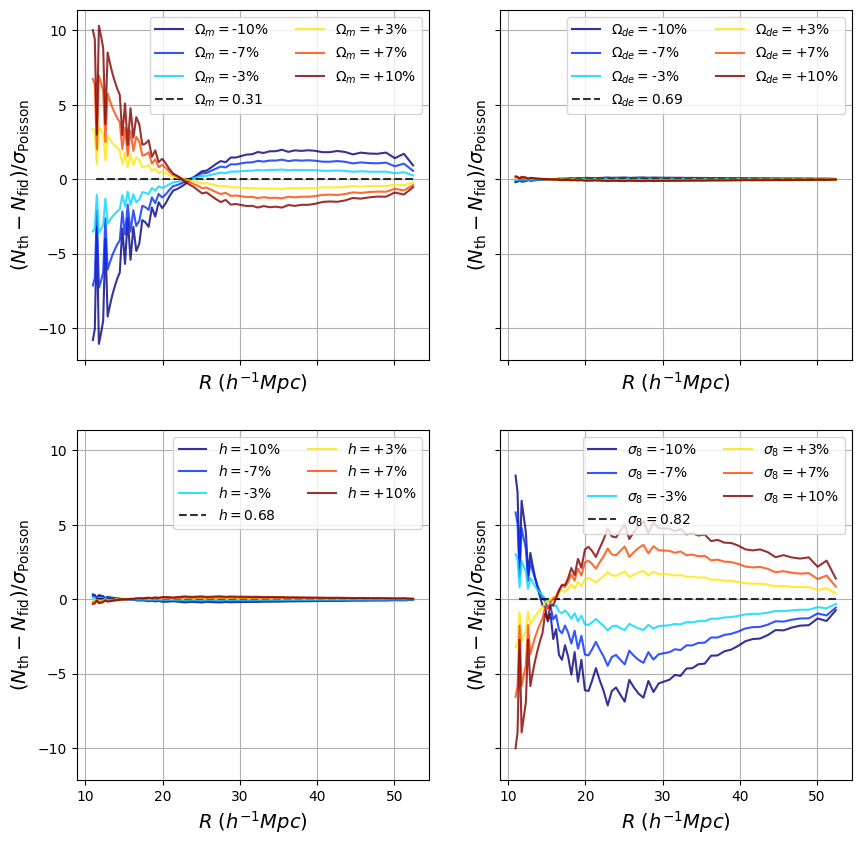

In [7]:
N = 7
var = 0.1  # maximum fractional variation of parameters
frac_dev = True

fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,10))
colors = plt.cm.jet(np.linspace(0,1,N))
for i in range(N):
    inc = (1-var + i*var*2/(N-1))
    Om_i, Ode_i, h_i, sigma8_i = inc*np.array([Om, Ode, h, sigma8])
    
    Om_cosm = cbl.Cosmology(Om_i, 0.0482, 0., 3.04, 0, Ode, h)
    Om_cosm.set_sigma8(sigma8)
#     plot_theory(Om_cosm, z, b_eff, *plot_args, ax=ax1, color='C0', alpha=0.1*i + 0.2,
#                 label=f'$\Omega_m=${labelling(Om_i,i,N,var)}')
    plot_frac(r, fid, err, Om_cosm, z, b_eff, frac_dev=frac_dev, ax=ax1, alpha=0.8,
              color='k' if i==(N//2) else colors[i], ls='--' if i==(N//2) else '-', 
              label=f'$\Omega_m=${labelling(Om_i,i,N,var)}')
    
    Ode_cosm = cbl.Cosmology(Om, 0.0482, 0., 3.04, 0, Ode_i, h)
    Ode_cosm.set_sigma8(sigma8)
#     plot_theory(Ode_cosm, z, b_eff, *plot_args, ax=ax2, color='C1', alpha=0.1*i + 0.2,
#                 label=f'$\Omega_{{de}}=${labelling(Ode_i,i,N,var)}')
    plot_frac(r, fid, err, Ode_cosm, z, b_eff, frac_dev=frac_dev, ax=ax2, alpha=0.8,
              color='k' if i==(N//2) else colors[i], ls='--' if i==(N//2) else '-',
              label=f'$\Omega_{{de}}=${labelling(Ode_i,i,N,var)}')
    
    h_cosm = cbl.Cosmology(Om, 0.0482, 0., 3.04, 0, Ode, h_i)
    h_cosm.set_sigma8(sigma8)
#     plot_theory(h_cosm, z, b_eff, *plot_args, ax=ax3, color='C2', alpha=0.1*i + 0.2,
#                 label=f'$h=${labelling(h_i,i,N,var)}')
    plot_frac(r, fid, err, h_cosm, z, b_eff, frac_dev=frac_dev, ax=ax3, alpha=0.8,
              color='k' if i==(N//2) else colors[i], ls='--' if i==(N//2) else '-',
              label=f'$h=${labelling(h_i,i,N,var)}')
    
    sigma8_cosm = cbl.Cosmology(Om, 0.0482, 0., 3.04, 0, Ode, h)
    sigma8_cosm.set_sigma8(sigma8_i)
#     plot_theory(sigma8_cosm, z, b_eff, *plot_args, ax=ax4, color='C3', alpha=0.1*i + 0.2,
#                 label=f'$\sigma_8=${labelling(sigma8_i,i,N,var)}')
    plot_frac(r, fid, err, sigma8_cosm, z, b_eff, frac_dev=frac_dev, ax=ax4, alpha=0.8,
              color='k' if i==(N//2) else colors[i], ls='--' if i==(N//2) else '-',
              label=f'$\sigma_8=${labelling(sigma8_i,i,N,var)}')
    
ax1.legend(ncols=2)
ax2.legend(ncols=2)
ax3.legend(ncols=2)
ax4.legend(ncols=2)

Low R is most sensitive to cosmology but Poisson errors are higher. Also spurious voids become more of a problem and the model may not work as well given that small voids are less spherical and isolated.

## Test overlap = 0.2

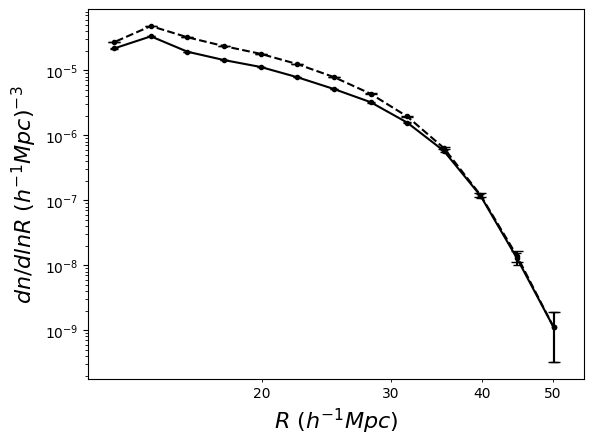

In [11]:
fig, ax = plt.subplots(1)
plot_vsf("output/void_vsf.npy", marker='o', color='k', markersize=3, capsize=3, ax=ax)
plot_vsf("output/overlap_void_vsf.npy", ls='--', marker='o', color='k', markersize=3, capsize=4, ax=ax)

Higher density threshold: 
- Low radius end -> more Poission noise (spurious voids) -> fit degrades
- High radius end -> better counting statistics for rare voids -> fit improves

## Test binning

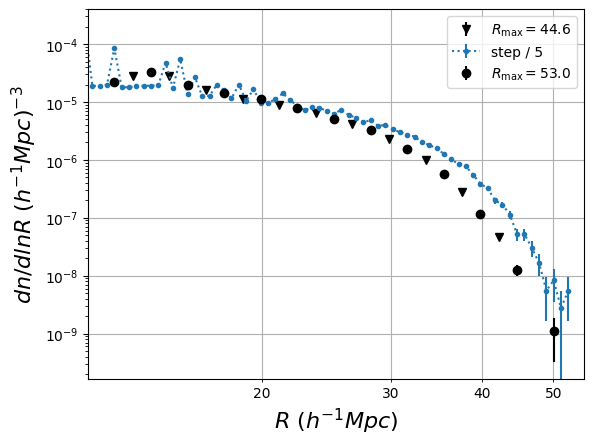

In [67]:
fig, ax = plt.subplots(1)
plot_vsf("output/r_reduced_void_vsf.npy", ax=ax, color='k', ls='', marker='v', label='$R_\mathrm{max}=44.6$')  # starting from smaller radius
plot_vsf("output/rstep0.01_void_vsf.npy", ax=ax, color='C0', ls=':', 
         marker='o', markersize='3', label='step / 5')  # radius step reduced from 0.05 to 0.01
plot_vsf("output/void_vsf.npy", ax=ax, color='k', marker='o', ls='', label='$R_\mathrm{max}=53.0$')
ax.legend()

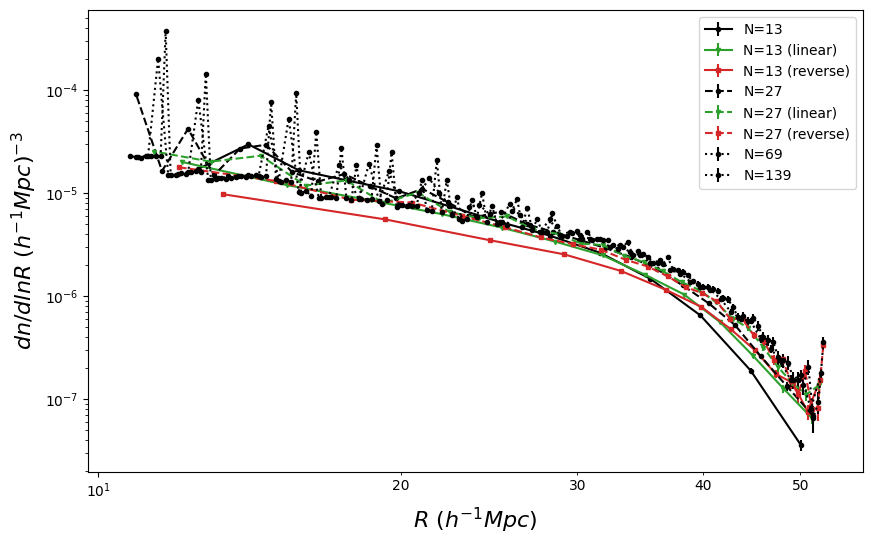

In [229]:
# deltav = -0.7
fig, ax = plt.subplots(1, figsize=(10,6))

# low sampling
N = np.load("output/deltav0.7_void_vsf.npy")[0].size
plot_vsf("output/deltav0.7_void_vsf.npy", ax=ax, color='k', ls='-', 
         marker='o', markersize='3', label=f'N={N}')  # starting from smaller radius

N = np.load("output/rstep-lin_deltav0.7_void_vsf.npy")[0].size
plot_vsf("output/rstep-lin_deltav0.7_void_vsf.npy", ax=ax, color='C2', ls='-', 
         marker='v', markersize='3', label=f'N={N} (linear)')

N = np.load("output/rstep-rev_deltav0.7_void_vsf.npy")[0].size
plot_vsf("output/rstep-rev_deltav0.7_void_vsf.npy", ax=ax, color='C3', ls='-', 
         marker='s', markersize='3', label=f'N={N} (reverse)')

# medium sampling
N = np.load("output/rstep0.025_deltav0.7_void_vsf.npy")[0].size
plot_vsf("output/rstep0.025_deltav0.7_void_vsf.npy", ax=ax, color='k', ls='--', 
         marker='o', markersize='3', label=f'N={N}') 

N = np.load("output/rstep0.025-lin_deltav0.7_void_vsf.npy")[0].size
plot_vsf("output/rstep0.025-lin_deltav0.7_void_vsf.npy", ax=ax, color='C2', ls='--', 
         marker='v', markersize='3', label=f'N={N} (linear)')

N = np.load("output/rstep0.025-rev_deltav0.7_void_vsf.npy")[0].size
plot_vsf("output/rstep0.025-rev_deltav0.7_void_vsf.npy", ax=ax, color='C3', ls='--', 
         marker='s', markersize='3', label=f'N={N} (reverse)')


# high sampling
N = np.load("output/rstep0.01_deltav0.7_void_vsf.npy")[0].size
plot_vsf("output/rstep0.01_deltav0.7_void_vsf.npy", ax=ax, color='k', ls=':', 
         marker='o', markersize='3', label=f'N={N}')  # radius step reduced from 0.05 to 0.01

N = np.load("output/rstep0.005_deltav0.7_void_vsf.npy")[0].size
plot_vsf("output/rstep0.005_deltav0.7_void_vsf.npy", ax=ax, color='k', ls=':', 
         marker='o', markersize='3', label=f'N={N}')




ax.legend()
# ax.set_xlim(30,60)

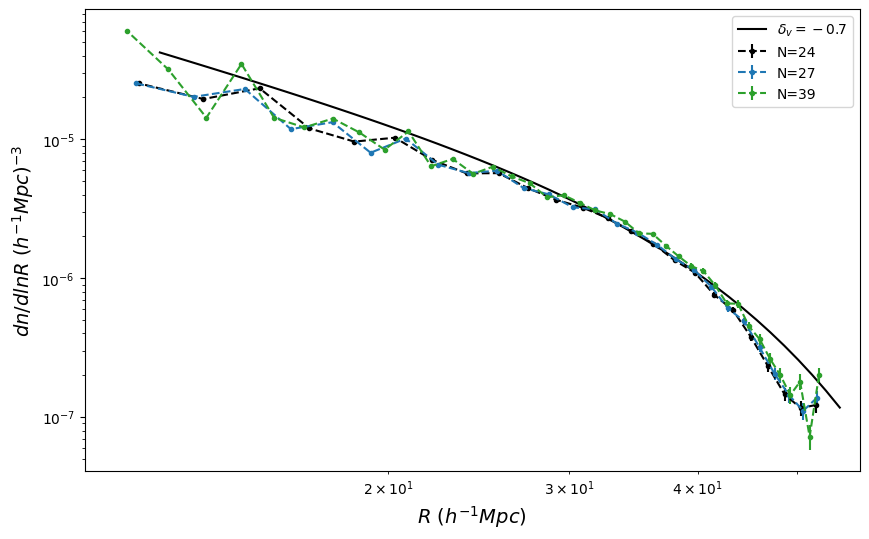

In [262]:
fig, ax = plt.subplots(1, figsize=(10,6))

# N = np.load("output/rstep0.005_deltav0.7_void_vsf.npy")[0].size
# plot_vsf("output/rstep0.005_deltav0.7_void_vsf.npy", ax=ax, color='k', ls='-', 
#          marker='o', markersize='3', label=f'N={N}')

N = np.load("output/rstep25-lin_deltav0.7_void_vsf.npy")[0].size
plot_vsf("output/rstep25-lin_deltav0.7_void_vsf.npy", ax=ax, color='k', ls='--', 
         marker='o', markersize='3', label=f'N={N}')

N = np.load("output/rstep0.025-lin_deltav0.7_void_vsf.npy")[0].size
plot_vsf("output/rstep0.025-lin_deltav0.7_void_vsf.npy", ax=ax, color='C0', ls='--', 
         marker='o', markersize='3', label=f'N={N}')

# N = np.load("output/rstep30-lin_deltav0.7_void_vsf.npy")[0].size
# plot_vsf("output/rstep30-lin_deltav0.7_void_vsf.npy", ax=ax, color='C1', ls='--', 
#          marker='o', markersize='3', label=f'N={N}')

N = np.load("output/rstep40-lin_deltav0.7_void_vsf.npy")[0].size
plot_vsf("output/rstep40-lin_deltav0.7_void_vsf.npy", ax=ax, color='C2', ls='--', 
         marker='o', markersize='3', label=f'N={N}')

plot_theory(cosm, z, 2., *plot_args, deltav_NL=-0.7, slope=1.35, offset=0.,
            color='k', ax=ax, label='$\delta_v=-0.7$')

ax.legend()

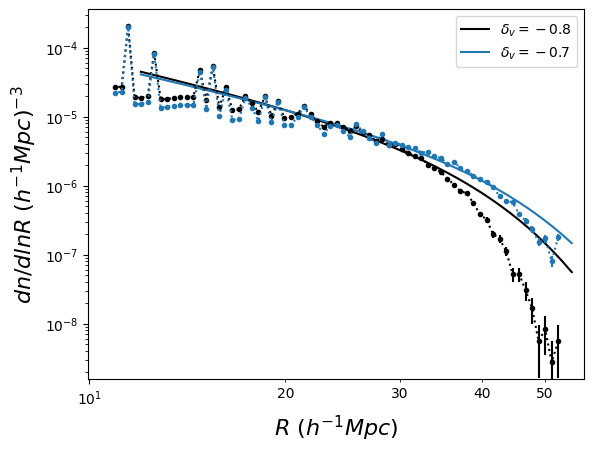

In [74]:
fig, ax = plt.subplots(1)
# delta = -0.8
plot_theory(cosm, z, beff, *plot_args, deltav_NL=-0.8, slope=1.4, offset=0.,
            color='k', ax=ax, label='$\delta_v=-0.8$')
plot_vsf("output/rstep0.01_void_vsf.npy", ax=ax, color='k', ls=':', marker='o', markersize=3)

# delta = -0.7
plot_theory(cosm, z, beff, *plot_args, deltav_NL=-0.7, slope=1.4, offset=0.,
            color='C0', ax=ax, label='$\delta_v=-0.7$')
plot_vsf("output/rstep0.01_delta0.7_void_vsf.npy", ax=ax, color='C0', ls=':', marker='o', markersize=3)
ax.legend()

## Test varying threshold

In [8]:
beff = 2
z = 0.52
kwargs = {'slope': 1.35, 'offset': 0.}
# kwargs = {'slope': 0.96, 'offset': 0.26}

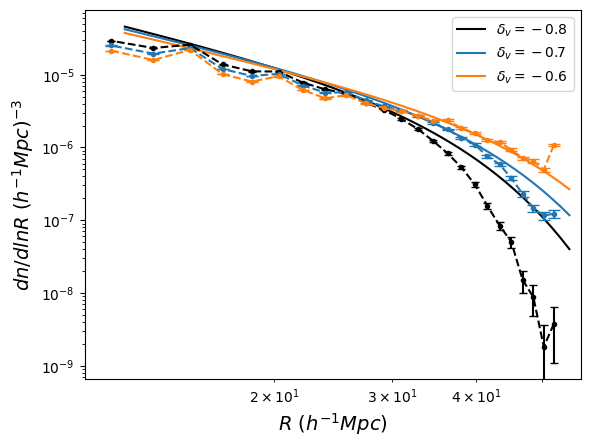

In [20]:
fig, ax = plt.subplots(1)
plot_vsf("output/rstep25-lin_deltav0.8_void_vsf.npy", ls='--', marker='o', color='k', markersize=3, capsize=3, ax=ax) # deltav=-0.8
plot_theory(cosm, z, beff, *plot_args, deltav_NL=-0.8, **kwargs,
            color='k', ax=ax, label='$\delta_v=-0.8$')
plot_vsf("output/rstep25-lin_deltav0.7_void_vsf.npy", ls='--', marker='o', color='C0', markersize=3, capsize=4, ax=ax) # deltav=-0.7
plot_theory(cosm, z, beff, *plot_args, deltav_NL=-0.7, **kwargs,
            color='C0', ax=ax, label='$\delta_v=-0.7$')
plot_vsf("output/rstep25-lin_deltav0.6_void_vsf.npy", ls='--', marker='o', color='C1', markersize=3, capsize=4, ax=ax) # deltav=-0.6
plot_theory(cosm, z, beff, *plot_args, deltav_NL=-0.6, **kwargs,
            color='C1', ax=ax, label='$\delta_v=-0.6$')
ax.legend()
# ax.set_xlim(11.5,55)
# ax.set_ylim(2e-10,8e-5)

Why does high R look better with high delta?
- Better number statistics?

Why does low R look worse with high delta?
- Cannot be spurious voids as we would expect an increase?
- Can't resolve smallest voids because of mesh resolution -> looks more like noise -> then should get more voids with increase in delta threshold? 
- Voids that have $\delta<-0.8$ should also be included in $\delta<-0.6$ (i.e. higher threshold should naively have more small voids) unless there is less room for them (more volume already occupied by larger voids)
- Smoothing could make voids overlap that are not actually overlapping -> allow a little overlap? More of a problem for smaller voids as they are less isolated

## Likelihood maximisation of void bias

In [6]:
def log_likelihood(r, vsf, err, z, deltav_NL, b_eff, slope=0.96, offset=0.26, model='Vdn'):
    theory = np.array([cosm.size_function(float(rr), z, model, b_eff, slope, offset, deltav_NL) for rr in r])
    chi2 = (vsf - theory)**2 / err**2 
    return np.sum(chi2)

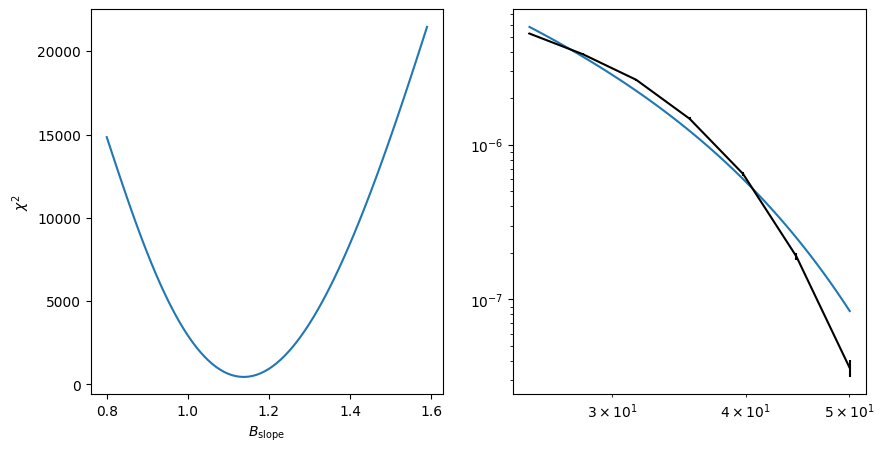

In [34]:
rcut = 6
b_eff = 2.
slopes = np.arange(0.8,1.6,0.01)
r, vsf, err = np.load("output/deltav0.7_void_vsf.npy")
r, vsf, err = r[:-rcut], vsf[:-rcut], err[:-rcut]  # cut out the smallest voids

lnL = np.zeros(slopes.size)
for (i,s) in enumerate(slopes):
    lnL[i] = log_likelihood(r, vsf, err, 0.52, -0.7, b_eff, slope=s, offset=0.)
    
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

# plot chi2 curve
ax1.plot(slopes, lnL)
ax1.set_ylabel('$\chi^2$')
ax1.set_xlabel('$B_\mathrm{slope}$')

# plot bestfit
RR = np.logspace(np.log10(r.min()), np.log10(r.max()), 50)
bf_theory = np.array(cosm.size_function(RR, 0.52, "Vdn", b_eff, slopes[np.argmin(lnL)], 0., -0.7))
ax2.errorbar(r, vsf, err, color='k')
ax2.plot(RR, bf_theory)
ax2.set_xscale('log')
ax2.set_yscale('log')

Hard to model the high radius end of the VSF - currently underestimating number of large voids.

## Test linear displacement reconstruction

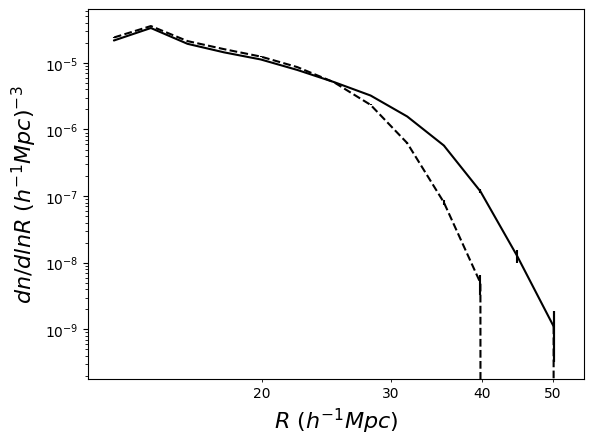

In [4]:
fig, ax = plt.subplots(1)
plot_vsf("output/void_vsf.npy", ax=ax, color='k')
plot_vsf("output/recon_disp_void_vsf.npy", ax=ax, color='k', ls='--')